## Hello World Agent

In [23]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [24]:
class AgentState(TypedDict): ## Our State schema
    message : str
    
def greeting_node(state: AgentState) -> AgentState:
    """ Simple node that adds a greeting message to the state """
    state['message'] = "Hey " + state['message'] + ", how's your day going?"
    
    return state

def compliment_node(state: AgentState) -> AgentState:
    """ Personalized Compliment Agent """
    state['message'] = state['message'] + ", you're doing an amazing job learning LangGraph!"
    return state

In [25]:
graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node)

graph.add_node("complimenter", compliment_node)

graph.set_entry_point("complimenter")
graph.set_finish_point("complimenter")

app = graph.compile()

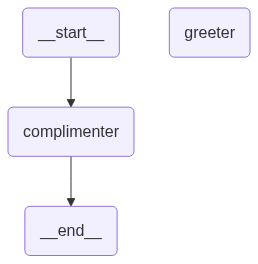

In [26]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
result = app.invoke({"message":"Bob"})

In [28]:
result["message"]

"Bob, you're doing an amazing job learning LangGraph!"